### Importing all required Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression
import seaborn as sns
sns.set()

### Loading the raw Data

In [3]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data.head(8)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6


### Preprocessing

#### Exploring the descriptive statistics of the varibales

In [4]:
#Provides only the numerical data by default
#raw_data.describe()

# To get all the variables , we should include all
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


<ul>
    <li>The observations count differs. Therefore there is a missing values in the dataset <b>( Count)</b></li>
    <li>There are 312 unique models. Which is hard to impliment in regression <b>( Unique -Model )</b></li>
    <li>The <b>"top"</b> Shows most repeated data and <b>"freq" </b>shows it's frequency. In Registration, there is Yes for almost all values of the variable. Therefore, it's good eliminate it.</li>
    <li>The lot of the informtion from the modelcould be engineered from  <b>Brand</b>, <b>Year</b> and <b>Enginee</b>. SO that we won't use mush of variability</li>

#### Determining the varibles of Interest

In [5]:
data = raw_data.drop(["Model"],axis = 1)
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Dealing with missing values

In [6]:
#Check the missing values. price and engineV has missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
#Dropped the missing Values
data1 = data.dropna(axis=0)
data1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDF's

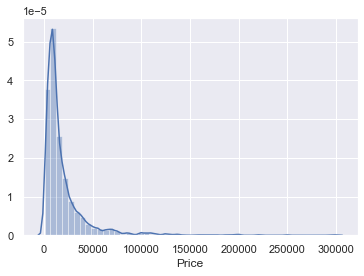

In [8]:
sns.distplot(data1['Price'])

##### The optimal result we will be looking for is a normal distribution. Here,  as the variance distribution of the price is not normal, definatly its a problem

### Dealing with the outliers

In [9]:
#general format : DataFrame.quantile(percetile)
#Here, we are trying to eliminate 1% of the pric observations to romove outliers and normalize the result

Q = data1['Price'].quantile(0.99)
data2 = data1[data1["Price"]<Q]


###### Here, I am just checking the quantile for 99% by eliminating 1% observations
###### Quantile : It's a distribution of rank order of the valu. 25%,50%,75%
###### Percentile : Discription of quantile ex: 75% quantile as 75th percentile

In [10]:
data2.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


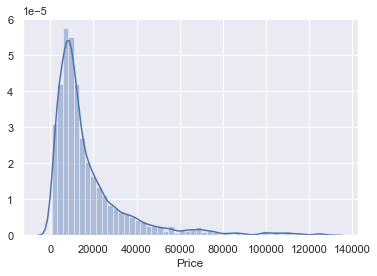

In [11]:
sns.distplot(data2['Price'])

##### Yet, it's not been normalized , but looks better than before

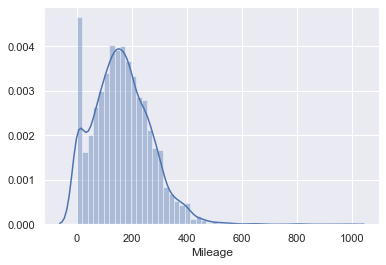

In [12]:
sns.distplot(data1['Mileage'])

In [13]:
Q = data1['Mileage'].quantile(0.99)
data3 = data1[data1["Mileage"]<Q]

In [14]:
data2.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


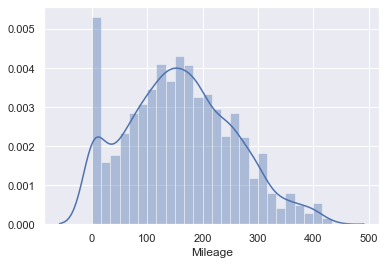

In [15]:
sns.distplot(data3['Mileage'])

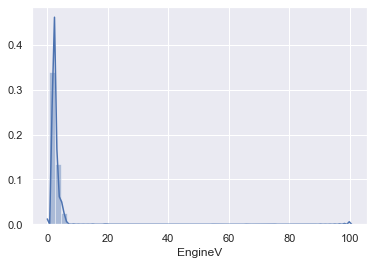

In [16]:
sns.distplot(data1['EngineV'])

In [17]:

data4 = data3[data3["EngineV"]<6.5]

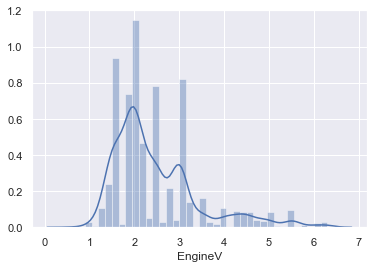

In [18]:
sns.distplot(data4['EngineV'])

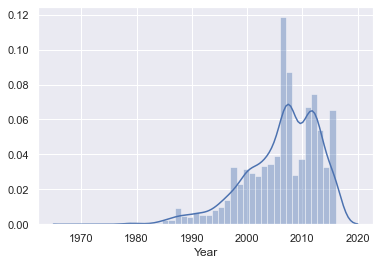

In [19]:
sns.distplot(data1['Year'])

In [20]:
Q = data4['Year'].quantile(0.01)
data5 = data4[data4["Year"]>Q]

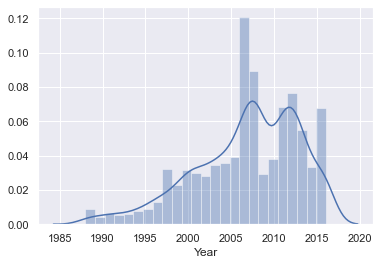

In [21]:
sns.distplot(data5['Year'])

#### Reset the variables

In [22]:
Data_cleansed = data5.reset_index(drop=True)
Data_cleansed.describe()

,Price,Mileage,EngineV,Year
count,3907.000000,3907.000000,3907.000000,3907.000000
mean,19960.692119,158.929358,2.474771,2006.798055
std,26048.838086,96.242696,0.978819,6.127291
min,800.000000,0.000000,0.600000,1988.000000
25%,7274.500000,89.500000,1.800000,2003.000000
50%,11800.000000,155.000000,2.200000,2008.000000
75%,22000.000000,225.000000,3.000000,2012.000000
max,300000.000000,433.000000,6.300000,2016.000000


### Checking the OLS assumptions

##### Relaxing the assumptions using log transformation

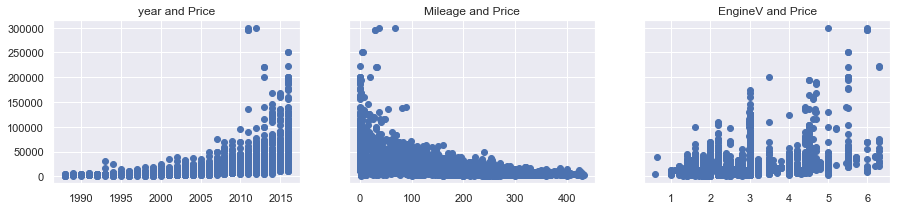

In [23]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them 
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)

f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(Data_cleansed["Year"],Data_cleansed["Price"])
ax1.set_title("year and Price")
ax2.scatter(Data_cleansed["Mileage"],Data_cleansed["Price"])
ax2.set_title("Mileage and Price")
ax3.scatter(Data_cleansed["EngineV"],Data_cleansed["Price"])
ax3.set_title("EngineV and Price")
plt.show()
    
    

#### Note: 

<ul>
<li>The price variable is not normalized completely. Therefore, the co-relation between price ( dependent variable) and any other variables ( Independent variable ) will not give linear result. </li>
    <li> Therefore, we should perform data transformation called log transformation. Log transformation is very useful when facing exponential relationships </li>
    <li> The log transformaation can be derived by using Numpy. The formula is "$np.log(x)$"
</ul>

In [24]:
log_price = np.log(Data_cleansed["Price"])
# assigning the new coulmn here to " Data_cleansed"
Data_cleansed["log_price"] = log_price

Data_cleansed

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


##### Plot again

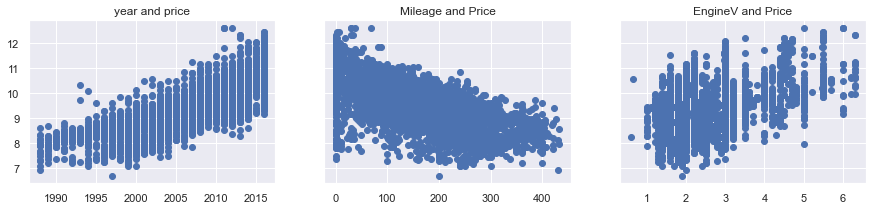

In [25]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(Data_cleansed["Year"],Data_cleansed["log_price"])
ax1.set_title("year and price")
ax2.scatter(Data_cleansed["Mileage"],Data_cleansed["log_price"])
ax2.set_title("Mileage and Price")
ax3.scatter(Data_cleansed["EngineV"],Data_cleansed["log_price"])
ax3.set_title("EngineV and Price")
plt.show()

In [26]:
# we can now drop the orginal price of the dataset. as iyt's no longer required
# Alaways assign a variable to make the perment changes
Data_cleansed = Data_cleansed.drop(['Price'], axis=1)


In [27]:
Data_cleansed

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### MultiColinarity Check

In [28]:
Data_cleansed.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

##### It's obvious that Mileage and Year are corelated. Therefore there is a existance of multicolinearity.
##### By using sklearn, we can't define the multicolinarity. We should use statsmodel to define that
##### One of the best way to check multicolinearlity is VIF ( Varience Inflation Factor ) from Statsmodel. It measures howmuch larger the square root of the standard error estimate is.

In [29]:
#import VIF method from statesmodel
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
#catagorizing the continues variables. Here, year, EngineV and mileage are continues
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = Data_cleansed[['Mileage','EngineV','Year']]
# It's just a syntax

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

vif

,VIF,Features
0,3.703266,Mileage
1,7.400348,EngineV
2,10.323287,Year


###### Note:

<ul>
    <li> If VIF = 1 , then no multicolinearity </li>
    <li> If VIF between 2 and 5 i.e VIF < 2 < 5 It's assumed to be perfectly okay </li>
    <li> if VIF > 6 is not okay. Yet, some statstians consider upto 7. </li>
    <li> In our example, Year  has "VIF = 10.323287". Which is too high and has to be removed </li> 
    
</ul>

###### The better question to ask is 'When can we safely ignore multicollinearity'.

Here's a great article on the topic: http://statisticalhorizons.com/multicollinearity

##### Regarding the variance inflation factor method that we employed from StatsModels, you can read the full documentation here: https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [30]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = Data_cleansed.drop(['Year'],axis=1)

### Create Dummy Variables. 




##### get_dummies will automatically spots all catogorical variables and  creates dummies automatically. The formula is as below

" $pd.get\_dummies(DataFrame[,drop\_first])$ "

##### Note:

If we have n catagories for a feature ( Independent variables ) then we  have to create n-1 dummies

for example: if there are 3 car brands Audi, Mercides and Toyota. We will create dummy for each brands except Audi. The system will automatically considers the first variable to be dummy if all other variables are 0.  For more understanding go through lecture 228. By chance, if you create dummy to first variable, then it will cause multicollinearity.


In [31]:
dummies = pd.get_dummies(data_no_multicollinearity,drop_first = True)
dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearrange the variables

In [33]:
dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
# Changed the position of log_price 
col = ['log_price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
new_data = dummies[col]
new_data

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [36]:
# Changing the log_price to Price

col1 = ['Price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
# After changing the log_price to Price, we have assign the above changes to new_data (DataFrame).
new_data.columns = col1

In [38]:
new_data

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


###### Checking multicolinarity for all catagorical variables just for better understanding. 

In [39]:
variables = new_data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,42.481209,Price
1,4.320885,Mileage
2,13.458369,EngineV
3,2.609516,Brand_BMW
4,3.195363,Brand_Mercedes-Benz
5,1.829070,Brand_Mitsubishi
6,2.277083,Brand_Renault
7,2.410711,Brand_Toyota
8,3.309179,Brand_Volkswagen
9,1.578076,Body_hatch


### Linear Regression Model

#### Declare Targets(depandent ) and inputs ( Independent )

In [40]:
# Define the targets and inputs. 
# In the above senario targets are Price. 
# The remaining are inputs

targets = new_data['Price']
inputs = new_data.drop(['Price'], axis = 1)

#### Scale the data



In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [42]:
scaled_inputs = scaler.transform(inputs)
scaled_inputs

array([[ 1.2269581 , -0.48510652,  2.28719478, ..., -0.16123864,
         1.31975543,  0.3195554 ],
       [ 2.78571742,  0.43448616, -0.43721681, ..., -0.16123864,
        -0.75771615,  0.3195554 ],
       [ 2.06868813,  2.5802024 , -0.43721681, ..., -0.16123864,
        -0.75771615,  0.3195554 ],
       ...,
       [-1.55802523,  0.53666312, -0.43721681, ..., -0.16123864,
        -0.75771615,  0.3195554 ],
       [-1.64115906,  1.04754794,  2.28719478, ..., -0.16123864,
         1.31975543,  0.3195554 ],
       [-0.36297641, -0.48510652, -0.43721681, ..., -0.16123864,
        -0.75771615,  0.3195554 ]])

Usually, it's not recommended to standardize the dummy variable. for ML purposes we rearely put too much start into it. The scaling has no effect on predictive power of dummies. Once scaled though, they lose all dummy meanings


### Train, test and split

#### Train

In [43]:
from sklearn.model_selection import train_test_split
# scaled_inputs are inputs/independent variables
# targets are dependent variables
# test_size = 80/20 rule
#random_state can be any number
# suffix with test will be used to test the model and the suffix with train will be used to train the model
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size= 0.2, random_state = 365)


#### create the regression

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

The result optained here is not a simple linear regression but a "$ Log Linear Regression $" as the Price variable is Log_price (Log Transformation )

The simple way to check results is to plot the predicted values against the observed values ( Nothing but the targets )

In [45]:

y_hat = reg.predict(x_train)

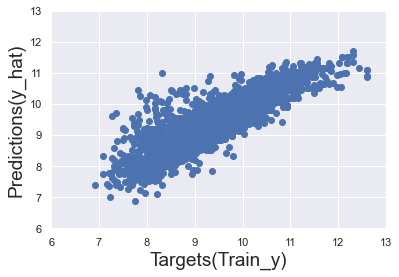

In [46]:
# Here, we are predicting x_train(inputs) of the train model with y_train(tragets) of the obesrevd values
plt.scatter(y_train, y_hat)
# Just to make more edcorative
plt.xlabel('Targets(Train_y)', size=19)
plt.ylabel('Predictions(y_hat)', size=19)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


### Plot Residual. 

Residuals : Is a difference between the observed values and the predicted values
    

Text(0.5, 1.0, 'Residuals PDF')

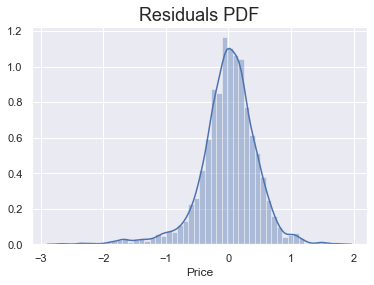

In [47]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

Result looks normal,mean is 0 too and homoscadasticity

The tail is longer towards left side(negetive). so, there are certain resudials which are much lower than mean ( Much higher price is predicted than is observed). The left tail overestimates the targets and right tail underestimates the targets

 ### Calculate R - Squared

In [48]:
reg.score(x_train, y_train)

0.7520453281718504

In [49]:
reg.intercept_

9.43753512973232

In [50]:
reg.coef_

array([-0.47713375,  0.25279341,  0.02659834,  0.03600588, -0.12726982,
       -0.16670307, -0.04848545, -0.07180363, -0.14024984, -0.09622117,
       -0.19162974, -0.10890609, -0.15699644, -0.12248327, -0.03067591,
       -0.14136631,  0.31071348])

In [51]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.477134
1,EngineV,0.252793
2,Brand_BMW,0.026598
3,Brand_Mercedes-Benz,0.036006
4,Brand_Mitsubishi,-0.127270
5,Brand_Renault,-0.166703
6,Brand_Toyota,-0.048485
7,Brand_Volkswagen,-0.071804
8,Body_hatch,-0.140250
9,Body_other,-0.096221


<ul>

<li><b>Here some of the weight values are positive and some are negetive</b></li>
<ol>
<li>The positive weight shows as the feature increases in value, so do the log price and price respectively. Example Engine price. As  engine value increase, the price wil increase too</li>
<li>The negetive weight shows that as the features increase tn the value the log_orice and price decreases. Example: Mileage value increase, the price decreases</li>

</ol>
</ul>


In [52]:
Data_cleansed['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

There are 7 car brands. as the feature of Benz, Mercides increase the price also increases. However, it's otherway for remaing brands

Also, Out of seveon brand, the Audi has been dropped because, when all the brands have the value 0, the Audi has 1 in  weight table( It's a benchmark )

### Observations

#### The positive weight states that the catagory of the brand is more expensive than the benchmark (Audi ) example: 'BMW', 'Mercedes-Benz',

#### The negetive weight states that the catagory of the brand is more cheaper than the benchmark (Audi ) example: 'Toyota', 'Renault', 'Volkswagen','Mitsubishi'

#### Testing 

In [53]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

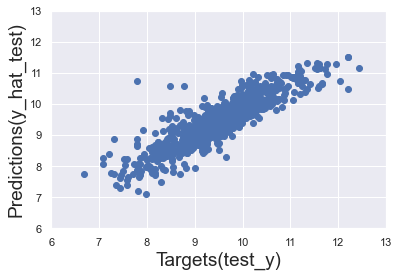

In [54]:
# Here, we are predicting x_test(inputs) of the train model with y_test(tragets) of the obesrevd values
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test)
# Just to make more edcorative
plt.xlabel('Targets(test_y)', size=19)
plt.ylabel('Predictions(y_hat_test)', size=19)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


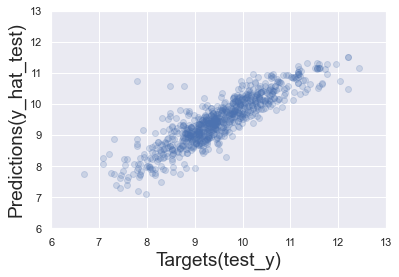

In [55]:
# Using Alpha gives the clear understaning of the observed values
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets(test_y)', size=19)
plt.ylabel('Predictions(y_hat_test)', size=19)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Here, Most of the observed values are concentrated  in the center

To understand how good the predictions are, lets create a new dataFrame to predict performance

In [56]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_performance = pd.DataFrame(np.exp(y_hat_test), columns = ["Predictions"])
df_performance.head()

,Predictions
0,2497.123713
1,7456.534893
2,13496.814274
3,7573.105796
4,16502.817902


Right now the results are in log format i.e log_price. we want it in price format.  We know that exponital is oppostite of log. $np.exp(x)$ Will return the price of the log_price. Therefore, including exp function in the above dataframe

In [57]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_performance['Target'] = np.exp(y_test)
df_performance

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Predictions,Target
0,2497.123713,NaN
1,7456.534893,7900.0
2,13496.814274,NaN
3,7573.105796,NaN
4,16502.817902,NaN
...,...,...
777,1866.980599,NaN
778,22010.975542,NaN
779,7804.297565,NaN
780,6923.705483,NaN


In [58]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.495542
1    9.287301
2    9.609116
3    9.305651
4    9.740910
Name: Price, dtype: float64

In [59]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Predictions,Target
0,2497.123713,1800.0
1,7456.534893,10800.0
2,13496.814274,14900.0
3,7573.105796,11000.0
4,16502.817902,16999.0
...,...,...
777,1866.980599,1950.0
778,22010.975542,21335.0
779,7804.297565,13500.0
780,6923.705483,6200.0


In [60]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_performance['Residual'] = df_performance['Target'] - df_performance['Predictions']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense
df_performance

,Predictions,Target,Residual
0,2497.123713,1800.0,-697.123713
1,7456.534893,10800.0,3343.465107
2,13496.814274,14900.0,1403.185726
3,7573.105796,11000.0,3426.894204
4,16502.817902,16999.0,496.182098
...,...,...,...
777,1866.980599,1950.0,83.019401
778,22010.975542,21335.0,-675.975542
779,7804.297565,13500.0,5695.702435
780,6923.705483,6200.0,-723.705483


In [61]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)
df_performance

,Predictions,Target,Residual,Difference%
0,2497.123713,1800.0,-697.123713,38.729095
1,7456.534893,10800.0,3343.465107,30.958010
2,13496.814274,14900.0,1403.185726,9.417354
3,7573.105796,11000.0,3426.894204,31.153584
4,16502.817902,16999.0,496.182098,2.918890
...,...,...,...,...
777,1866.980599,1950.0,83.019401,4.257405
778,22010.975542,21335.0,-675.975542,3.168388
779,7804.297565,13500.0,5695.702435,42.190388
780,6923.705483,6200.0,-723.705483,11.672669


In [62]:
# Exploring the descriptives here gives us additional insights
df_performance.describe()

,Predictions,Target,Residual,Difference%
count,782.000000,782.000000,782.000000,782.000000
mean,17668.626792,20717.216803,3048.590012,35.024687
std,15260.172350,25654.851301,15487.661137,79.023527
min,1195.372625,800.000000,-44009.355675,0.044431
25%,7642.370756,7500.000000,-2106.719386,10.244297
50%,12647.391012,12500.000000,453.938710,23.326711
75%,22630.721407,23324.750000,3734.118831,38.876238
max,99473.692128,249999.000000,179168.433265,1833.723153


In [65]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_performance.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
54,32385.60,32400.00,14.40,0.04
662,46574.25,46500.00,-74.25,0.16
384,17600.14,17639.47,39.33,0.22
526,54866.55,55000.00,133.45,0.24
240,8278.72,8300.00,21.28,0.26
497,8323.24,8350.00,26.76,0.32
580,12944.41,12900.00,-44.41,0.34
270,18930.10,18999.00,68.90,0.36
607,32359.77,32500.00,140.23,0.43
565,12839.50,12900.00,60.50,0.47


In [64]:
df_performance

,Predictions,Target,Residual,Difference%
0,2497.12,1800.00,-697.12,38.73
1,7456.53,10800.00,3343.47,30.96
2,13496.81,14900.00,1403.19,9.42
3,7573.11,11000.00,3426.89,31.15
4,16502.82,16999.00,496.18,2.92
5,8782.09,8900.00,117.91,1.32
6,36938.43,107000.00,70061.57,65.48
7,5129.05,6900.00,1770.95,25.67
8,19320.02,35000.00,15679.98,44.80
9,10696.32,19995.00,9298.68,46.51


##### The predictions are the results, targets, are the approximation of the values to be obtained, reseduals says the differnec between the predicted and targeted values and difference% says the difference between them. 

##### from the observations, we know that, the last few prediction values are higher than the targeted values ( i.e the predicted values are far from the targeted values ). For thos, the resedules are in negitive. 

#####  Yet, the model is  not accurate. to do that, we   either have to:

1. Use the different variables
2. remove the outliers of the model and try
3. use differnt kind of transformation


